## Cleaning Data and Descriptive Statistics
We will use the dataset from [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)

In [97]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset into pandas DataFrame
We know that there are no column names (headers) for the data file. We will extract the column (variable/attribute) names from the description file.

In [36]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data", header=None)
df.shape

(1994, 128)

The name of variables is described as `"@attribute state numeric"` in the file, we will use a handy pandas trick [`converters` in `pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to extract the the second string to get the variable name

In [27]:
get_colnames = lambda x: x.split()[1]
names = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names", 
                    header=None, nrows=128, skiprows=75, converters = {0: get_colnames})

In [28]:
names.head()

,0
0,state
1,county
2,community
3,communityname
4,fold


Assign the dataset with the column names.

In [48]:
# df.columns = list(names.to_string())
df.columns = names.ix[:, 0]
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


### Descriptive Statistics on the dataset
`DataFrame.describe()` is a handy method to show the summary statistics for the variables. However, it will only show for those variables without missing values. 

In [47]:
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
df.dtypes

0
state                     int64
county                   object
community                object
communityname            object
fold                      int64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSam

### Dealing with missing values
As we see from the first few rows of the dataset, there are quite a few columns with missing values which we need to clean up the data. The missing values is represented by **`"?"`**

We can use [DataFrame.isin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html#pandas.DataFrame.isin) to get a boolean dataframe showing which field containing **`"?"`**. Then to find out which column (variable) has the missing values.

In [91]:
filtered = df.isin(["?"])
s1 = filtered.sum()
print("There are {0} variables with missing values.".format(len(s1[s1 > 0])))
s1[s1>0]

There are 25 variables with missing values.


0
county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

In [92]:
df[df["OtherPerCap"].isin(["?"])]

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
130,28,?,?,Natchezcity,1,0.02,0.38,0.98,0.22,0.01,...,0.04,0.12,0.05,?,?,?,?,0.0,?,0.23


A handy way we can do is to replace the **`"?"`** with `numpy.nan` to represent the missing data. Then we can call `DataFrame.dropna()` to easily omit the columns (`axis=1`) with any missing data.

In [94]:
df1 = df.replace("?", np.nan)
df_clean = df1.dropna(axis=1)

In [95]:
df_clean.shape

(1994, 103)

### Compute the correlation
We know that the goal variable is `ViolentCrimesPerPop` (Violent Crimes per Population). We will calculate the correlation to find out the top most predictive variables with respect to the goal variable.

In [104]:
df_corr = df_clean.corr()
goal_corr = df_corr["ViolentCrimesPerPop"].abs()

#### The top 10 most predictive variables

In [110]:
top_corr = goal_corr.sort_values(ascending=False)[:10]
top_corr

0
ViolentCrimesPerPop    1.000000
PctKids2Par            0.738424
PctIlleg               0.737957
PctFam2Par             0.706667
racePctWhite           0.684770
PctYoungKids2Par       0.666059
PctTeen2Par            0.661582
racepctblack           0.631264
pctWInvInc             0.576324
pctWPubAsst            0.574665
Name: ViolentCrimesPerPop, dtype: float64

In [121]:
inds = top_corr.index
inds

Index(['ViolentCrimesPerPop', 'PctKids2Par', 'PctIlleg', 'PctFam2Par',
       'racePctWhite', 'PctYoungKids2Par', 'PctTeen2Par', 'racepctblack',
       'pctWInvInc', 'pctWPubAsst'],
      dtype='object', name=0)

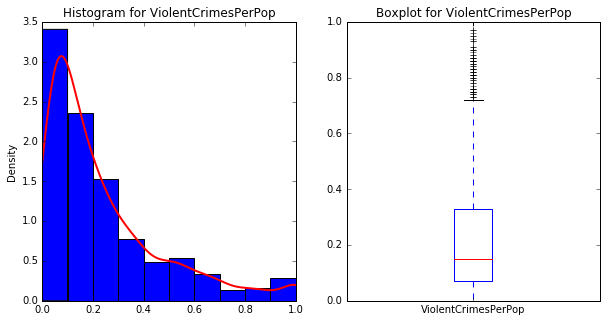

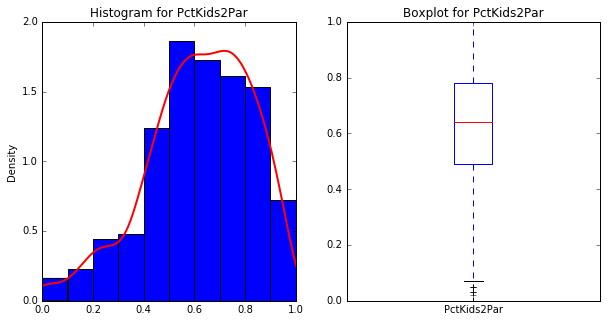

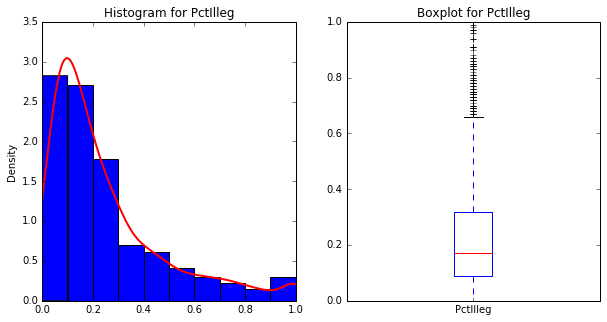

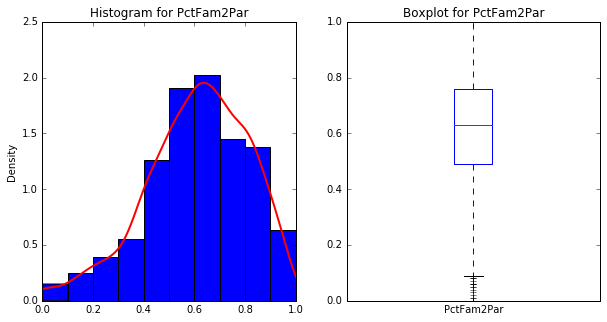

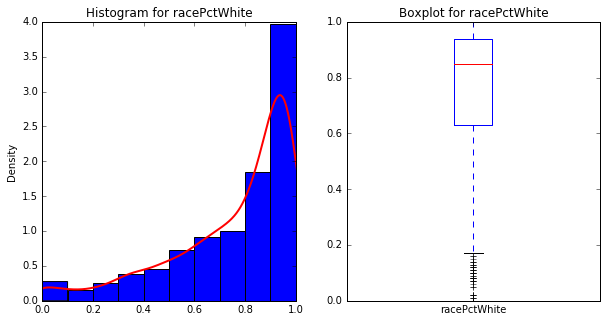

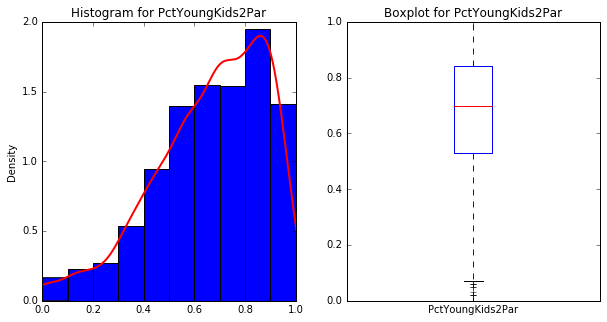

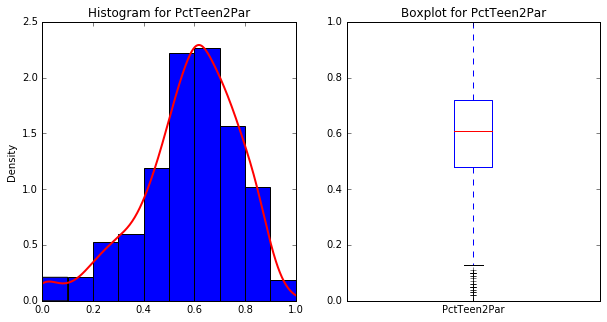

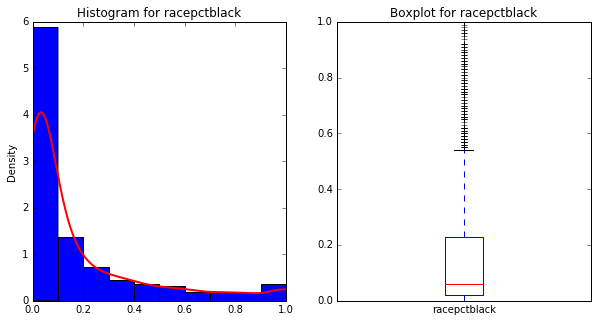

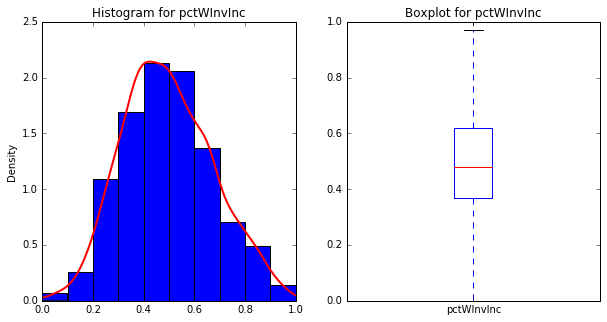

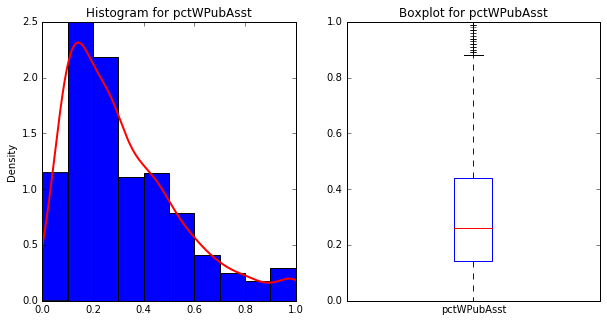

In [139]:
for var in inds:
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.xlim(0, 1)
    plt.title("Histogram for {0}".format(var))
    df[var].plot(kind="hist", normed=1)
    df[var].plot(kind="kde", color="r", linewidth=2)
    plt.subplot(122)
    plt.title("Boxplot for {0}".format(var))
    df[var].plot(kind="box")
    plt.show()